<a href="https://colab.research.google.com/github/xlxusxls/Autonomous-AI/blob/main/KNN_EEG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**KNN (최근접 이웃) & K - Means 구하기**

In [ ]:
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import numpy as np

# MNIST 데이터셋 로드
mnist = fetch_openml('mnist_784')

# 특징 벡터와 레이블 준비
X = mnist.data
y = mnist.target

# 데이터를 훈련 및 테스트 세트로 분리 (80% 훈련, 20% 테스트)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# KNN 모델 정의 (K=3)
knn = KNeighborsClassifier(n_neighbors=3)

# 모델 훈련
knn.fit(X_train, y_train)

# 테스트 데이터로 예측
y_pred = knn.predict(X_test)

# 정확도 출력
accuracy = accuracy_score(y_test, y_pred)
print(f"KNN Test Accuracy: {accuracy:.4f}")

KNN Test Accuracy: 0.9713


In [ ]:
from sklearn.decomposition import PCA

# PCA로 차원 축소 (예: 50개의 주요 성분만 사용)
pca = PCA(n_components=50)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# KNN 모델을 차원 축소된 데이터에 적용
knn_pca = KNeighborsClassifier(n_neighbors=3)
knn_pca.fit(X_train_pca, y_train)

# 예측 및 정확도 계산
y_pred_pca = knn_pca.predict(X_test_pca)
accuracy_pca = accuracy_score(y_test, y_pred_pca)
print(f"KNN with PCA Test Accuracy: {accuracy_pca:.4f}")


KNN with PCA Test Accuracy: 0.9772


https://about-db.tistory.com/93

In [ ]:
from numpy import *
import numpy
numpy.version.version

'1.26.4'

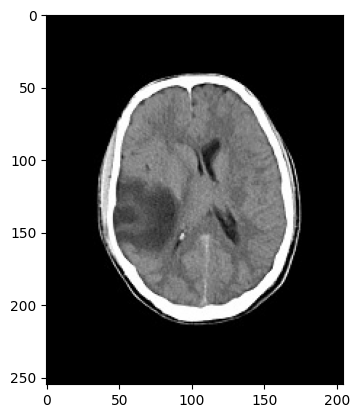

In [ ]:
import cv2
import numpy
import matplotlib.pyplot as plt
from scipy.cluster.vq import *
img = cv2.imread('/content/sample_data/ct_tumor (1).jpg')
plt.imshow(img)

In [ ]:
center = 3
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
datalab = cv2.cvtColor(img,cv2.COLOR_BGR2LAB)

In [ ]:
column = len(datalab[1,])
rows = len(datalab)

In [ ]:
column

205

In [ ]:
rows

255

In [ ]:
ab = datalab[:,:,2:3]
ab = reshape(ab,rows*column,order="C")
print(ab.shape)

(52275,)


In [ ]:
ans ,arr = kmeans2(ab.astype(float),center,iter=15,missing='warn')

<ipython-input-10-ed036ac44858>:1: UserWarning: One of the clusters is empty. Re-run kmeans with a different initialization.
  ans ,arr = kmeans2(ab.astype(float),center,iter=15,missing='warn')


In [ ]:
cluster = []
a = []
for i in range(center):
    cluster.append(a)
    a = []

arr = reshape(arr,(rows,column),order='C')

img_backup = img.copy()
print (ans)

[128. 128. 128.]


In [ ]:
for i in range(rows):
    for j in range(column):
        img_backup[i,j] = [0,0,0]

In [ ]:
for z in range(center):
    for x in range(rows):
        for y in range(column):
            if arr[x,y] == z:
                #print z
                img_backup[x,y] = img[x,y]
                #cluster[z].append([x,y])
    cv2.imwrite('%s.jpg'%z,img_backup)
    print ('cluster%s'%z)

cluster0
cluster1
cluster2


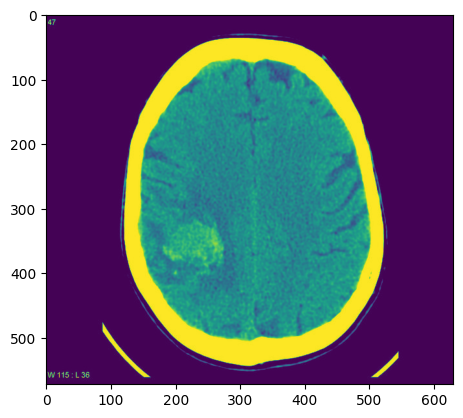

In [ ]:
img_0 = cv2.imread('/content/sample_data/ct_tumor (2).jpg')
img_0 = img_0[:,:,0]
plt.imshow(img_0)

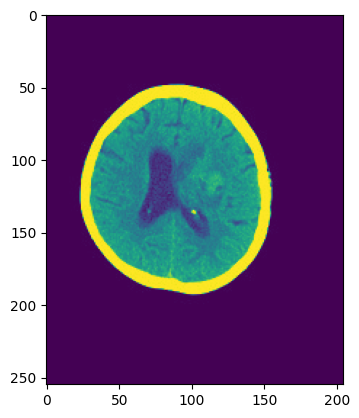

In [ ]:
img_1 = cv2.imread('/content/sample_data/ct_tumor (3).jpg')
img_1 = img_1[:,:,0]
plt.imshow(img_1)

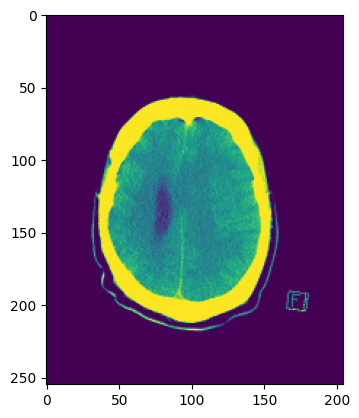

In [ ]:
img_2 = cv2.imread('/content/sample_data/ct_tumor (4).jpg')
img_2 = img_2[:,:,0]
plt.imshow(img_2)

In [ ]:
img_0.shape

(572, 630)

In [ ]:
import cv2
import numpy
from scipy.cluster.vq import *
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
from scipy import ndimage as ndi

from skimage import data
from skimage.metrics import (adapted_rand_error,
                              variation_of_information)
from skimage.filters import sobel
from skimage.measure import label
from skimage.util import img_as_float
from skimage.feature import canny
from skimage.morphology import remove_small_objects
from skimage.segmentation import (morphological_geodesic_active_contour,
                                  inverse_gaussian_gradient,
                                  watershed,
                                  mark_boundaries)

import matplotlib.pyplot as plt
from skimage import data, img_as_float
from skimage.segmentation import chan_vese

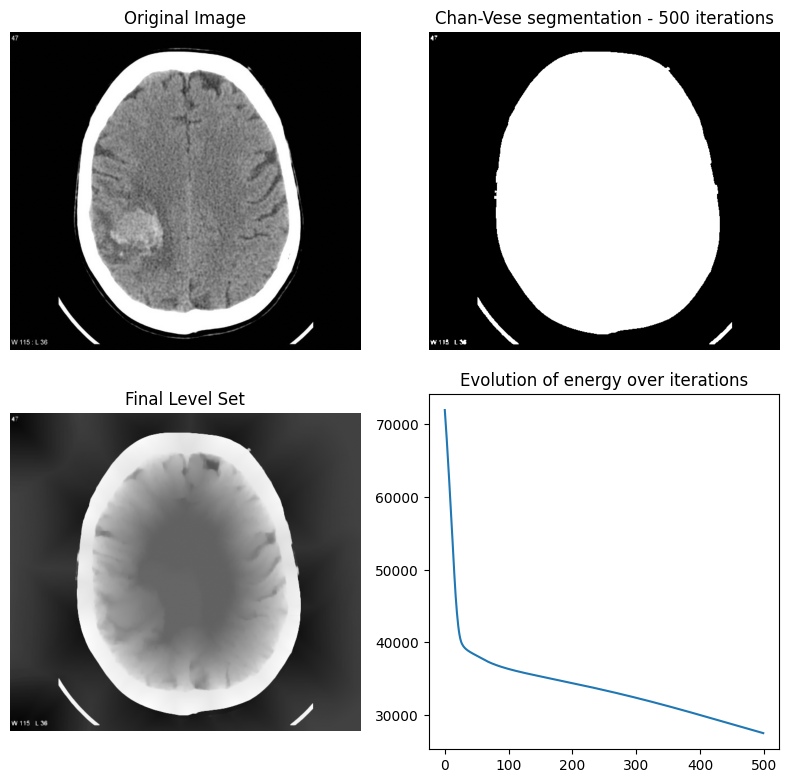

In [ ]:
#image = img_as_float(data.camera())
# Feel free to play around with the parameters to see how they impact the result
cv = chan_vese(img_0, mu=0.25, lambda1=1, lambda2=1, tol=1e-3, dt=0.5, init_level_set="checkerboard", extended_output=True)

fig, axes = plt.subplots(2, 2, figsize=(8, 8))
ax = axes.flatten()

ax[0].imshow(img_0, cmap="gray")
ax[0].set_axis_off()
ax[0].set_title("Original Image", fontsize=12)

ax[1].imshow(cv[0], cmap="gray")
ax[1].set_axis_off()
title = "Chan-Vese segmentation - {} iterations".format(len(cv[2]))
ax[1].set_title(title, fontsize=12)

ax[2].imshow(cv[1], cmap="gray")
ax[2].set_axis_off()
ax[2].set_title("Final Level Set", fontsize=12)

ax[3].plot(cv[2])
ax[3].set_title("Evolution of energy over iterations", fontsize=12)

fig.tight_layout()
plt.show()

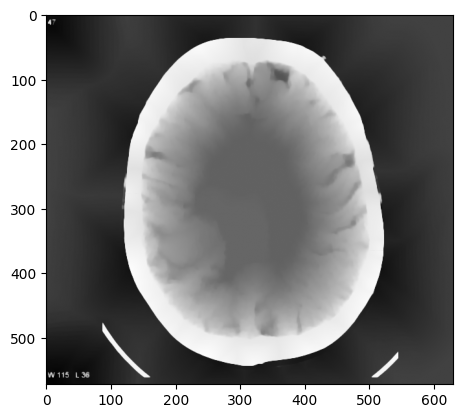

In [ ]:
img_cv = cv[1]
plt.imshow(img_cv, cmap='gray')

Help on function morphological_geodesic_active_contour in module skimage.segmentation.morphsnakes:

morphological_geodesic_active_contour(gimage, num_iter, init_level_set='disk', smoothing=1, threshold='auto', balloon=0, iter_callback=<function <lambda> at 0x78bb44b04860>)
    Morphological Geodesic Active Contours (MorphGAC).
    
    Geodesic active contours implemented with morphological operators. It can
    be used to segment objects with visible but noisy, cluttered, broken
    borders.
    
    Parameters
    ----------
    gimage : (M, N) or (L, M, N) array
        Preprocessed image or volume to be segmented. This is very rarely the
        original image. Instead, this is usually a preprocessed version of the
        original image that enhances and highlights the borders (or other
        structures) of the object to segment.
        :func:`morphological_geodesic_active_contour` will try to stop the contour
        evolution in areas where `gimage` is small. See
        :fun


## Method: Compact watershed
Adapted Rand error: 0.9869623387619041
Adapted Rand precision: 0.0065616059352514204
Adapted Rand recall: 0.9999691756201219
False Splits: 7.489676810963168
False Merges: 0.029158433545488582

## Method: Canny filter
Adapted Rand error: 0.0001095240829813715
Adapted Rand precision: 0.9997813070018622
Adapted Rand recall: 0.9999996686756966
False Splits: 0.2820674196359897
False Merges: 0.027476338755198497

## Method: Morphological Geodesic Active Contours
Adapted Rand error: 0.0028807130140717785
Adapted Rand precision: 0.998638906157661
Adapted Rand recall: 0.9956042855670187
False Splits: 0.4396743504822032
False Merges: 0.4060704668796456


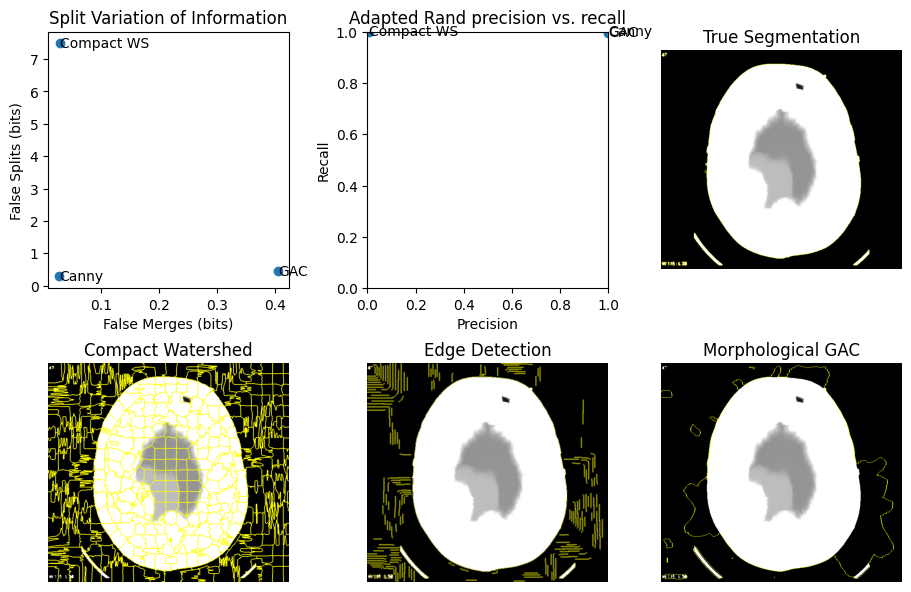

In [ ]:
!pip install scikit-image
from skimage.segmentation import morphological_geodesic_active_contour
help(morphological_geodesic_active_contour)

elevation_map = sobel(img_cv)
markers = np.zeros_like(img_cv, dtype = int)
markers[img_0 < 30] = 1
markers[img_0 > 150] = 2
im_true = watershed(elevation_map, markers)
im_true = ndi.label(ndi.binary_fill_holes(im_true - 1))[0]
edges = sobel(img_cv)
im_test1 = watershed(edges, markers=468, compactness=0.001)
edges = canny(img_cv)
fill_coins = ndi.binary_fill_holes(edges)
im_test2 = ndi.label(remove_small_objects(fill_coins, 21))[0]

image = img_as_float(img_cv)
gradient = inverse_gaussian_gradient(image)
init_ls = np.zeros(image.shape, dtype=np.int8)
init_ls[10:-10, 10:-10] = 1
im_test3 = morphological_geodesic_active_contour(gradient,num_iter=500,
                                                 init_level_set=init_ls,
                                                 smoothing=1, balloon=-1,
                                                 threshold=0.69)
im_test3 = label(im_test3)

method_names = ['Compact watershed', 'Canny filter',
                'Morphological Geodesic Active Contours']
short_method_names = ['Compact WS', 'Canny', 'GAC']

precision_list = []
recall_list = []
split_list = []
merge_list = []
for name, im_test in zip(method_names, [im_test1, im_test2, im_test3]):
    error, precision, recall = adapted_rand_error(im_true, im_test)
    splits, merges = variation_of_information(im_true, im_test)
    split_list.append(splits)
    merge_list.append(merges)
    precision_list.append(precision)
    recall_list.append(recall)
    print(f"\n## Method: {name}")
    print(f"Adapted Rand error: {error}")
    print(f"Adapted Rand precision: {precision}")
    print(f"Adapted Rand recall: {recall}")
    print(f"False Splits: {splits}")
    print(f"False Merges: {merges}")

fig, axes = plt.subplots(2, 3, figsize=(9, 6), constrained_layout=True)
ax = axes.ravel()

ax[0].scatter(merge_list, split_list)
for i, txt in enumerate(short_method_names):
    ax[0].annotate(txt, (merge_list[i], split_list[i]),
                   verticalalignment='center')
ax[0].set_xlabel('False Merges (bits)')
ax[0].set_ylabel('False Splits (bits)')
ax[0].set_title('Split Variation of Information')

ax[1].scatter(precision_list, recall_list)
for i, txt in enumerate(short_method_names):
    ax[1].annotate(txt, (precision_list[i], recall_list[i]),
                   verticalalignment='center')
ax[1].set_xlabel('Precision')
ax[1].set_ylabel('Recall')
ax[1].set_title('Adapted Rand precision vs. recall')
ax[1].set_xlim(0, 1)
ax[1].set_ylim(0, 1)

ax[2].imshow(mark_boundaries(image, im_true))
ax[2].set_title('True Segmentation')
ax[2].set_axis_off()

ax[3].imshow(mark_boundaries(image, im_test1))
ax[3].set_title('Compact Watershed')
ax[3].set_axis_off()

ax[4].imshow(mark_boundaries(image, im_test2))
ax[4].set_title('Edge Detection')
ax[4].set_axis_off()

ax[5].imshow(mark_boundaries(image, im_test3))
ax[5].set_title('Morphological GAC')
ax[5].set_axis_off()

plt.show()